In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [27]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
from citipy import citipy

In [29]:

cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [30]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [31]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=960223c3125812ad143bd8039296ff97


In [32]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | huntsville
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | katsuura
Processing Record 5 of Set 1 | batagay
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | marcona
City not found. Skipping...
Processing Record 9 of Set 1 | krasnoselkup
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | najran
Processing Record 12 of Set 1 | bentiu
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | tupelo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | carutapera
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of 

Processing Record 38 of Set 4 | powell
Processing Record 39 of Set 4 | berlevag
Processing Record 40 of Set 4 | takhtamygda
Processing Record 41 of Set 4 | lahat
Processing Record 42 of Set 4 | victoria
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | husavik
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | vardo
Processing Record 48 of Set 4 | montepuez
Processing Record 49 of Set 4 | fredericksburg
Processing Record 50 of Set 4 | pacific grove
Processing Record 1 of Set 5 | purpe
Processing Record 2 of Set 5 | san policarpo
Processing Record 3 of Set 5 | serta
Processing Record 4 of Set 5 | mamlyutka
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | labuhan
Processing Record 7 of Set 5 | chadiza
Processing Record 8 of Set 5 | kenora
Processing Record 9 of Set 5 | cordoba
Processing Record 10 of Set 5 | khatanga
Processing Record 11 of Set 5 |

Processing Record 29 of Set 8 | acari
Processing Record 30 of Set 8 | kishtwar
Processing Record 31 of Set 8 | huarmey
Processing Record 32 of Set 8 | warmbad
Processing Record 33 of Set 8 | pemangkat
Processing Record 34 of Set 8 | whitehorse
Processing Record 35 of Set 8 | sotnikovskoye
Processing Record 36 of Set 8 | sterling
Processing Record 37 of Set 8 | kalaleh
Processing Record 38 of Set 8 | teluknaga
Processing Record 39 of Set 8 | zhizdra
Processing Record 40 of Set 8 | dobryanka
Processing Record 41 of Set 8 | asau
Processing Record 42 of Set 8 | beringovskiy
Processing Record 43 of Set 8 | stephenville
Processing Record 44 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 45 of Set 8 | scarborough
Processing Record 46 of Set 8 | neuquen
Processing Record 47 of Set 8 | lashio
Processing Record 48 of Set 8 | kahului
Processing Record 49 of Set 8 | bahia de caraquez
Processing Record 50 of Set 8 | charters towers
Processing Record 1 of Set 9 | taltal
Processi

Processing Record 18 of Set 12 | wahiawa
Processing Record 19 of Set 12 | ostersund
Processing Record 20 of Set 12 | nuevo progreso
Processing Record 21 of Set 12 | belmopan
Processing Record 22 of Set 12 | dakar
Processing Record 23 of Set 12 | soyo
Processing Record 24 of Set 12 | maniitsoq
Processing Record 25 of Set 12 | lexington
Processing Record 26 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 27 of Set 12 | alofi
Processing Record 28 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 29 of Set 12 | yichang
Processing Record 30 of Set 12 | tukrah
Processing Record 31 of Set 12 | sorland
Processing Record 32 of Set 12 | akureyri
Processing Record 33 of Set 12 | gigmoto
Processing Record 34 of Set 12 | mentok
City not found. Skipping...
Processing Record 35 of Set 12 | abu dhabi
Processing Record 36 of Set 12 | portland
Processing Record 37 of Set 12 | ust-kuyga
Processing Record 38 of Set 12 | mednogorskiy
Processing Record 39 of Set 12 | mas

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,60.01,66,94,14.00,AU,2020-09-30 17:56:33
1,Huntsville,34.73,-86.59,73.99,49,1,11.41,US,2020-09-30 17:52:32
2,Kapaa,22.08,-159.32,73.00,83,1,8.05,US,2020-09-30 17:55:13
3,Katsuura,35.13,140.30,66.20,88,90,9.17,JP,2020-09-30 17:56:34
4,Batagay,67.63,134.63,28.56,86,63,5.68,RU,2020-09-30 17:56:34
5,Yellowknife,62.46,-114.35,39.99,100,75,3.36,CA,2020-09-30 17:56:35
6,Tuktoyaktuk,69.45,-133.04,33.80,100,90,5.82,CA,2020-09-30 17:56:35
7,Krasnoselkup,65.70,82.47,32.20,95,95,3.87,RU,2020-09-30 17:56:36
8,Hobart,-42.88,147.33,52.00,53,100,14.99,AU,2020-09-30 17:52:28
9,Najran,17.49,44.13,84.20,16,1,4.36,SA,2020-09-30 17:56:36


In [35]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_complete_df=city_data_df[new_column_order]
city_data_complete_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-09-30 17:56:33,-33.65,115.33,60.01,66,94,14.00
1,Huntsville,US,2020-09-30 17:52:32,34.73,-86.59,73.99,49,1,11.41
2,Kapaa,US,2020-09-30 17:55:13,22.08,-159.32,73.00,83,1,8.05
3,Katsuura,JP,2020-09-30 17:56:34,35.13,140.30,66.20,88,90,9.17
4,Batagay,RU,2020-09-30 17:56:34,67.63,134.63,28.56,86,63,5.68
...,...,...,...,...,...,...,...,...,...
565,Matara,LK,2020-09-30 17:59:39,5.95,80.54,77.52,88,94,9.17
566,Kamalasai,TH,2020-09-30 17:59:40,16.34,103.58,76.26,90,38,4.43
567,Belyy Yar,RU,2020-09-30 17:59:40,53.60,91.39,33.80,80,92,2.24
568,Malanje,AO,2020-09-30 17:59:40,-9.54,16.34,77.00,83,75,11.41


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [38]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/30/20'

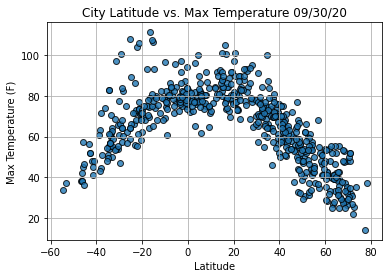

In [39]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

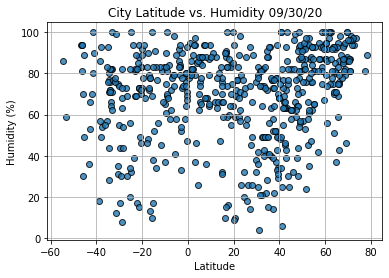

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

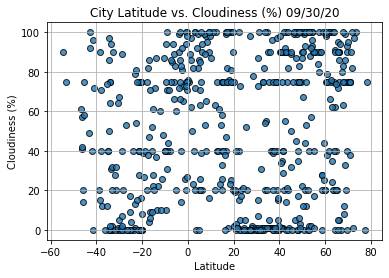

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

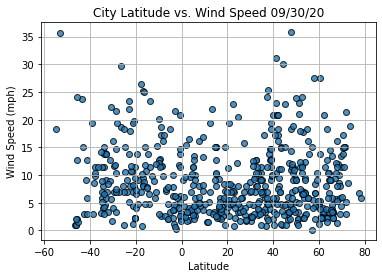

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [58]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [59]:
index13 = city_data_df.loc[13]
index13

City                       Tupelo
Lat                         34.26
Lng                         -88.7
Max Temp                     75.2
Humidity                       41
Cloudiness                      1
Wind Speed                   9.17
Country                        US
Date          2020-09-30 17:56:38
Name: 13, dtype: object

In [60]:
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,60.01,66,94,14.00,AU,2020-09-30 17:56:33
8,Hobart,-42.88,147.33,52.00,53,100,14.99,AU,2020-09-30 17:52:28
11,Ushuaia,-54.80,-68.30,33.80,86,90,18.34,AR,2020-09-30 17:52:41
15,Carutapera,-1.20,-46.02,87.15,58,26,11.86,BR,2020-09-30 17:56:38
16,New Norfolk,-42.78,147.06,52.00,66,92,3.00,AU,2020-09-30 17:56:38
...,...,...,...,...,...,...,...,...,...
554,Luderitz,-26.65,15.16,56.79,69,0,29.68,NA,2020-09-30 17:59:36
555,Manicore,-5.81,-61.30,95.32,41,83,2.10,BR,2020-09-30 17:59:36
561,Cocal,-28.62,-49.35,83.89,63,89,7.54,BR,2020-09-30 17:59:38
562,Itapirapua,-15.82,-50.61,107.24,10,9,11.88,BR,2020-09-30 17:59:38


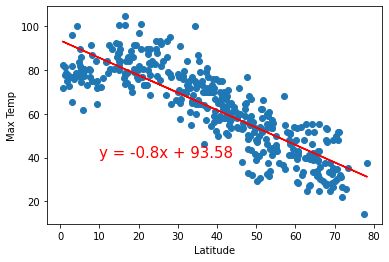

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

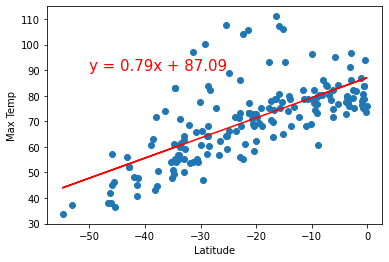

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

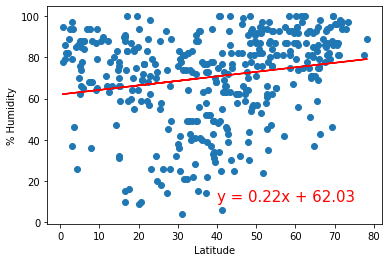

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

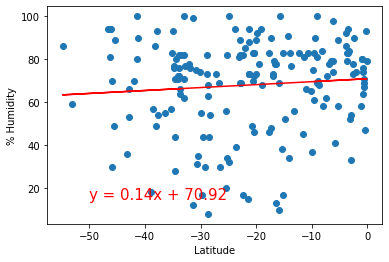

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

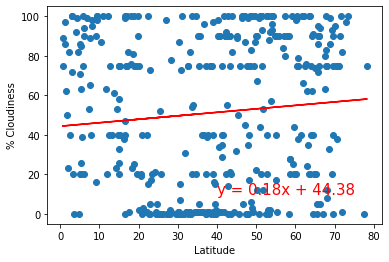

In [68]:
#Linear Regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness','% Cloudiness',(40,10))

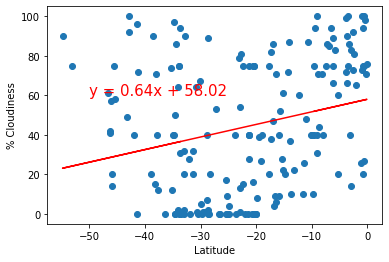

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

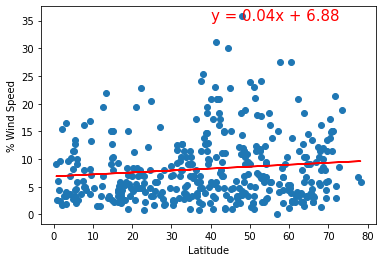

In [72]:
#Linear Regression on Wind Speed for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Wind Speed', '% Wind Speed',(40,35))

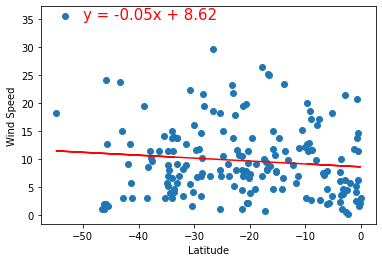

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for Wind Speed', 'Wind Speed',(-50,35))